In [1]:
%pip install EC4py

  Using cached ec4py-0.2.2-py3-none-any.whl.metadata (2.8 kB)
Using cached ec4py-0.2.2-py3-none-any.whl (20 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
from ec4py import EC_Data
import matplotlib.pyplot as plt
#from scipy.signal import 
from pathlib import Path
import sys

In [4]:
#Find CV files to plot
files = list(Path().glob('CV*.tdms'))

#Load all data files
data = []
for path_to_file in files:
    data.append(EC_Data(path_to_file))


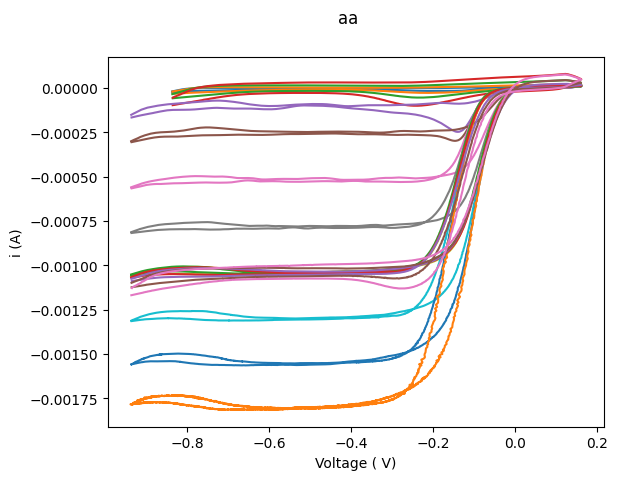

In [5]:
#Plot CV files
fig = plt.figure()
plt.suptitle("aa")
b = fig.subplots(1)
for x in data:
    x.plot("E","i", plot=b, y_smooth=40)

In [19]:
####SPLITT
import numpy as np
import math
x = data[1].E
y = data[1].i
t = data[1].Time

xmin = x.min()
xmax = x.max()

x_start = np.mean(x[0:3])
index_min = np.argmin(x)
index_max = np.argmax(x)


x_div = np.gradient(x)
zero_crossings = np.where(np.diff(np.signbit(x_div)))[0]

up_start =0
up_end = 0



print(zero_crossings)
if x[0]<x[zero_crossings[0]]:
    print("up")
    up_start =0
    up_end = zero_crossings[0]
    dn_start = zero_crossings[0]
    dn_end = x.size
else:
    up_start =zero_crossings[0]
    up_end = x.size
    dn_start = 0
    dn_end = zero_crossings[0]
    
    

x_u = x[0:zero_crossings[0]]
y_u = y[0:zero_crossings[0]]
x_n = np.flipud(x[zero_crossings[0]:])
y_n = np.flipud(y[zero_crossings[0]:])
x_sweep = np.linspace(-2.5, 2.5, 1000)
y_up=np.interp(x_sweep, x_u, y_u)
y_down=np.interp(x_sweep, x_n, y_n)

for i in range(1,y_up.size):
    if y_up[i-1] == y_up[i]:
        y_up[i-1] = math.nan
    else :
        break
    
for i in range(y_up.size-2,0,-1):
    if y_up[i] == y_up[i+1]:
        y_up[i+1] = math.nan
    else :
        break
    
for i in range(1,y_down.size):
    if y_down[i-1] == y_down[i]:
        y_down[i-1] = math.nan
    else :
        break
    
for i in range(y_down.size-2,0,-1):
    if y_down[i] == y_down[i+1]:
        y_down[i+1] = math.nan
    else :
        break

##positive going and then negative going.
xb = x[0:index_max]
yb = y[0:index_max]
xa = np.linspace(-2.5, 2.5, 5000)
yinterp = np.interp(xa, xb, yb)
index_of_element = -1

 

len = x.size
tn = t[index_max::-1]
xn = np.flipud(x[index_max:])
yn = np.flipud(y[index_max:])
y_neg = np.interp(xa, xn, yn)



[499]
up


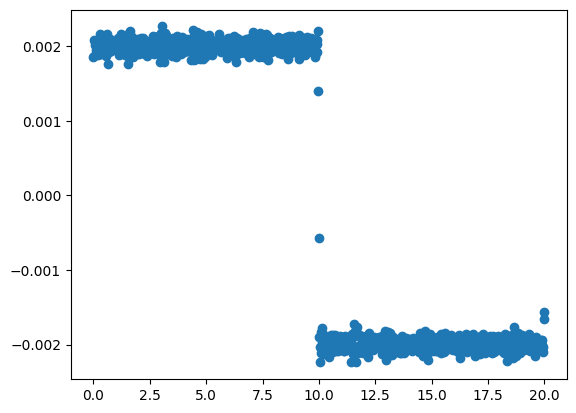

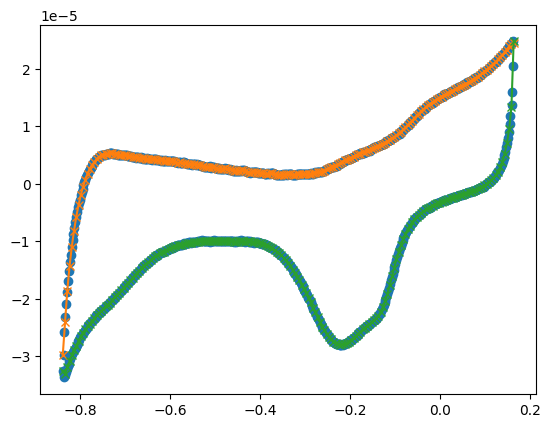

In [20]:
import matplotlib.pyplot as plt

#plt.plot(t, x, 'o')
plt.plot(t, x_div, 'o')
#plt.plot(xa, yinterp, '-x')
plt.show()

plt.plot(x, y, 'o')

plt.plot(x_sweep, y_up, '-x')
plt.plot(x_sweep, y_down, '-x')
plt.show()